# Level 1 - Let's continue with Pandas

The *pandas* package is the most important tool at the disposal of Data Scientists and Analysts working in Python today. The powerful machine learning and glamorous visualization tools may get all the attention, but pandas is the backbone of most data projects. 

>\[*pandas*\] is derived from the term "**pan**el **da**ta", an econometrics term for data sets that include observations over multiple time periods for the same individuals. — [Wikipedia](https://en.wikipedia.org/wiki/Pandas_%28software%29)

If you're thinking about data science as a career, then it is imperative that one of the first things you do is learn pandas. In this post, we will go over the essential bits of information about pandas, including how to install it, its uses, and how it works with other common Python data analysis packages such as **matplotlib** and **sci-kit learn**.

<img src="assets/the-rise-in-popularity-of-pandas.png" width=70%/>

## What's Pandas for?

Pandas has so many uses that it might make sense to list the things it can't do instead of what it can do. 

This tool is essentially your data’s home. Through pandas, you get acquainted with your data by cleaning, transforming, and analyzing it. 

For example, say you want to explore a dataset stored in a CSV on your computer. Pandas will extract the data from that CSV into a DataFrame — a table, basically — then let you do things like:

- Calculate statistics and answer questions about the data, like


    - What's the average, median, max, or min of each column? 
    - Does column A correlate with column B?
    - What does the distribution of data in column C look like?


- Clean the data by doing things like removing missing values and filtering rows or columns by some criteria


- Visualize the data with help from Matplotlib. Plot bars, lines, histograms, bubbles, and more. 


- Store the cleaned, transformed data back into a CSV, other file or database


Before you jump into the modeling or the complex visualizations you need to have a good understanding of the nature of your dataset and pandas is the best avenue through which to do that.



## How does pandas fit into the data science toolkit?

Not only is the pandas library a central component of the data science toolkit but it is used in conjunction with other libraries in that collection. 

Pandas is built on top of the **NumPy** package, meaning a lot of the structure of NumPy is used or replicated in Pandas. Data in pandas is often used to feed statistical analysis in **SciPy**, plotting functions from **Matplotlib**, and machine learning algorithms in **Scikit-learn**.

Jupyter Notebooks offer a good environment for using pandas to do data exploration and modeling, but pandas can also be used in text editors just as easily.

Jupyter Notebooks give us the ability to execute code in a particular cell as opposed to running the entire file. This saves a lot of time when working with large datasets and complex transformations. Notebooks also provide an easy way to visualize pandas’ DataFrames and plots. As a matter of fact, this article was created entirely in a Jupyter Notebook.

## When should you start using pandas?

If you do not have any experience coding in Python, then you should stay away from learning pandas until you do. You don’t have to be at the level of the software engineer, but you should be adept at the basics, such as lists, tuples, dictionaries, functions, and iterations. Also, I’d also recommend familiarizing yourself with **NumPy** due to the similarities mentioned above.

If you're looking for a good place to learn Python, [Python for Everybody](https://www.learndatasci.com/out/coursera-programming-everybody-getting-started-python/) on Coursera is great (and Free).

Moreover, for those of you looking to do a [data science bootcamp](https://www.learndatasci.com/articles/thinkful-data-science-online-bootcamp-review/) or some other accelerated data science education program, it's highly recommended you start learning pandas on your own before you start the program. 

Even though accelerated programs teach you pandas, better skills beforehand means you'll be able to maximize time for learning and mastering the more complicated material.

## Pandas First Steps

### Install and import
Pandas is an easy package to install. Open up your terminal program (for Mac users) or command line (for PC users) and install it using either of the following commands:

`conda install pandas`

OR 

`pip install pandas`

Alternatively, if you're currently viewing this article in a Jupyter notebook you can run this cell:

In [1]:
!pip install pandas

The `!` at the beginning runs cells as if they were in a terminal.

To import pandas we usually import it with a shorter name since it's used so much:

In [2]:
import numpy as np
import pandas as pd

Now to the basic components of pandas.

## Core components of pandas: Series and DataFrames

The primary two components of pandas are the `Series` and `DataFrame`. 

A `Series` is essentially a column, and a `DataFrame` is a multi-dimensional table made up of a collection of Series. 

<img src="assets/series-and-dataframe.png" width=600px />

DataFrames and Series are quite similar in that many operations that you can do with one you can do with the other, such as filling in null values and calculating the mean.

You'll see how these components work when we start working with data below. 

### Creating DataFrames from scratch
Creating DataFrames right in Python is good to know and quite useful when testing new methods and functions you find in the pandas docs.

There are *many* ways to create a DataFrame from scratch, but a great option is to just use a simple `dict`. 

Let's say we have a fruit stand that sells apples and oranges. We want to have a column for each fruit and a row for each customer purchase. To organize this as a dictionary for pandas we could do something like:

In [3]:
data = {
    'apples': [300, 200, 0, 100], 
    'oranges': [0, 30, 70, 20]
}

In [4]:
data

{'apples': [300, 200, 0, 100], 'oranges': [0, 30, 70, 20]}

And then pass it to the pandas DataFrame constructor:

In [5]:
purchases = pd.DataFrame(data)

purchases

,apples,oranges
0,300,0
1,200,30
2,0,70
3,100,20


In [6]:
purchases.iloc[1]

apples     200
oranges     30
Name: 1, dtype: int64

**How did that work?**

Each *(key, value)* item in `data` corresponds to a *column* in the resulting DataFrame.

The **Index** of this DataFrame was given to us on creation as the numbers 0-3, but we could also create our own when we initialize the DataFrame. 

Let's have customer names as our index: 

In [7]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])

purchases

,apples,oranges
June,300,0
Robert,200,30
Lily,0,70
David,100,20


So now we could **loc**ate a customer's order by using their name:

In [8]:
purchases.loc['June']

apples     300
oranges      0
Name: June, dtype: int64

There's more on locating and extracting data from the DataFrame later, but now you should be able to create a DataFrame with any random data to learn on.

Let's move on to some quick methods for creating DataFrames from various other sources.

## How to read in data

It’s quite simple to load data from various file formats into a DataFrame. In the following examples we'll keep using our apples and oranges data, but this time it's coming from various files.

### Reading data from CSVs

With CSV files all you need is a single line to load in the data:

In [9]:
df = pd.read_csv('assets/purchases.csv')

df

,Unnamed: 0,apples,oranges
0,June,3,0
1,Robert,2,3
2,Lily,0,7
3,David,1,2


CSVs don't have indexes like our DataFrames, so all we need to do is just designate the `index_col` when reading:

In [10]:
df = pd.read_csv('assets/purchases.csv', index_col=0)

df

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


Here we're setting the index to be column zero.

You'll find that most CSVs won't ever have an index column and so usually you don't have to worry about this step.

### Reading data from JSON

If you have a JSON file — which is essentially a stored Python `dict` — pandas can read this just as easily:

In [11]:
df = pd.read_json('assets/purchases.json')

df['mangoes'] = [5,4,1,2]

In [12]:
df

,apples,oranges,mangoes
June,3,0,5
Robert,2,3,4
Lily,0,7,1
David,1,2,2


Notice this time our index came with us correctly since using JSON allowed indexes to work through nesting. Feel free to open `data_file.json` in a notepad so you can see how it works.

Pandas will try to figure out how to create a DataFrame by analyzing structure of your JSON, and sometimes it doesn't get it right. Often you'll need to set the `orient` keyword argument depending on the structure, so check out [read_json docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html) about that argument to see which orientation you're using.

Just like with CSVs, we could pass `index_col='index'`, but we can also set an index after-the-fact:

In fact, we could use `set_index()` on *any* DataFrame using *any* column at *any* time. Indexing Series and DataFrames is a very common task, and the different ways of doing it is worth remembering.

### Converting back to a CSV or JSON

So after extensive work on cleaning your data, you’re now ready to save it as a file of your choice. Similar to the ways we read in data, pandas provides intuitive commands to save it:

In [13]:
df.to_csv('new_purchases.csv')

df.to_json('new_purchases.json')

When we save JSON and CSV files, all we have to input into those functions is our desired filename with the appropriate file extension. With SQL, we’re not creating a new file but instead inserting a new table into the database using our `con` variable from before.

Let's move on to importing some real-world data and detailing a few of the operations you'll be using a lot.


## Most important DataFrame operations

DataFrames possess hundreds of methods and other operations that are crucial to any analysis. As a beginner, you should know the operations that perform simple transformations of your data and those that provide fundamental statistical analysis.

Let's load in the IMDB movies dataset to begin:

In [14]:
movies_df = pd.read_csv("assets/IMDB-Movie-Data.csv", index_col='Rank')

In [15]:
movies_df

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


We're loading this dataset from a CSV and designating the movie titles to be our index.

### Viewing your data

The first thing to do when opening a new dataset is print out a few rows to keep as a visual reference. We accomplish this with `.head()`:

In [16]:
movies_df.head(2)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


`.head()` outputs the **first** five rows of your DataFrame by default, but we could also pass a number as well: `movies_df.head(10)` would output the top ten rows, for example. 

To see the **last** five rows use `.tail()`. `tail()` also accepts a number, and in this case we printing the bottom two rows.:

In [17]:
movies_df.tail(2)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [18]:
movies_df.iloc[501:503]

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
502,Carol,"Drama,Romance",An aspiring photographer develops an intimate ...,Todd Haynes,"Cate Blanchett, Rooney Mara, Sarah Paulson, Ky...",2015,118,7.2,77995,0.25,95.0
503,Imperium,"Crime,Drama,Thriller","A young FBI agent, eager to prove himself in t...",Daniel Ragussis,"Daniel Radcliffe, Toni Collette, Tracy Letts, ...",2016,109,6.5,27428,NaN,68.0


Typically when we load in a dataset, we like to view the first five or so rows to see what's under the hood. Here we can see the names of each column, the index, and examples of values in each row.

You'll notice that the index in our DataFrame is the *Title* column, which you can tell by how the word *Title* is slightly lower than the rest of the columns.

### Getting info about your data

`.info()` should be one of the very first commands you run after loading your data:

In [19]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


`.info()` provides the essential details about your dataset, such as the number of rows and columns, the number of non-null values, what type of data is in each column, and how much memory your DataFrame is using. 

Notice in our movies dataset we have some obvious missing values in the `Revenue` and `Metascore` columns. We'll look at how to handle those in a bit.

Seeing the datatype quickly is actually quite useful. Imagine you just imported some JSON and the integers were recorded as strings. You go to do some arithmetic and find an "unsupported operand" Exception because you can't do math with strings. Calling `.info()` will quickly point out that your column you thought was all integers are actually string objects.

Another fast and useful attribute is `.shape`, which outputs just a tuple of (rows, columns):

In [20]:
movies_df.shape

(1000, 11)

Note that `.shape` has no parentheses and is a simple tuple of format (rows, columns). So we have **1000 rows** and **11 columns** in our movies DataFrame.

You'll be going to `.shape` a lot when cleaning and transforming data. For example, you might filter some rows based on some criteria and then want to know quickly how many rows were removed.

### Handling duplicates

This dataset does not have duplicate rows, but it is always important to verify you aren't aggregating duplicate rows. 

To demonstrate, let's simply just double up our movies DataFrame by concatenating it to itself:

In [21]:
temp_df = pd.concat([movies_df, movies_df, movies_df])

# Now, you can access the shape of the concatenated DataFrame
temp_df.shape

(3000, 11)

In [22]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               3000 non-null   object 
 1   Genre               3000 non-null   object 
 2   Description         3000 non-null   object 
 3   Director            3000 non-null   object 
 4   Actors              3000 non-null   object 
 5   Year                3000 non-null   int64  
 6   Runtime (Minutes)   3000 non-null   int64  
 7   Rating              3000 non-null   float64
 8   Votes               3000 non-null   int64  
 9   Revenue (Millions)  2616 non-null   float64
 10  Metascore           2808 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 281.2+ KB


Using `concat()` will return a copy without affecting the original DataFrame. We are capturing this copy in `temp` so we aren't working with the real data.

Notice call `.shape` quickly proves our DataFrame rows have doubled.

Now we can try dropping duplicates:

In [23]:
temp_df = temp_df.drop_duplicates()

temp_df.shape

(1000, 11)

Just like `concat()`, the `drop_duplicates()` method will also return a copy of your DataFrame, but this time with duplicates removed. Calling `.shape` confirms we're back to the 1000 rows of our original dataset.

### Column cleanup

Many times datasets will have verbose column names with symbols, upper and lowercase words, spaces, and typos. To make selecting data by column name easier we can spend a little time cleaning up their names.

Here's how to print the column names of our dataset:

In [24]:
movies_df.columns

Index(['Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Not only does `.columns` come in handy if you want to rename columns by allowing for simple copy and paste, it's also useful if you need to understand why you are receiving a `Key Error` when selecting data by column.

We can use the `.rename()` method to rename certain or all columns via a `dict`. We don't want parentheses, so let's rename those:

In [25]:
movies_df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)


movies_df.columns

Index(['Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime', 'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

### How to work with missing values

When exploring data, you’ll most likely encounter missing or null values, which are essentially placeholders for non-existent values. Most commonly you'll see Python's `None` or NumPy's `np.nan`, each of which are handled differently in some situations.

There are two options in dealing with nulls: 

1. Get rid of rows or columns with nulls
2. Replace nulls with non-null values, a technique known as **imputation**

Let's calculate to total number of nulls in each column of our dataset. The first step is to check which cells in our DataFrame are null:

In [26]:
movies_df.isnull()

,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Rank,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
996,False,False,False,False,False,False,False,False,False,True,False
997,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False


Notice `isnull()` returns a DataFrame where each cell is either True or False depending on that cell's null status.

To count the number of nulls in each column we use an aggregate function for summing: 

In [27]:
movies_df.isnull().sum()

Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime               0
Rating                0
Votes                 0
Revenue_millions    128
Metascore            64
dtype: int64

In [28]:
temp_df.isnull().sum()

Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

`.isnull()` just by iteself isn't very useful, and is usually used in conjunction with other methods, like `sum()`.

We can see now that our data has **128** missing values for `revenue_millions` and **64** missing values for `metascore`.

#### Removing null values

Data Scientists and Analysts regularly face the dilemma of dropping or imputing null values, and is a decision that requires intimate knowledge of your data and its context. Overall, removing null data is only suggested if you have a small amount of missing data.

Remove nulls is pretty simple:

In [29]:
movies_df.dropna(axis=0)

,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0


This operation will delete any **row** with at least a single null value, but it will return a new DataFrame without altering the original one. You could specify `inplace=True` in this method as well.

So in the case of our dataset, this operation would remove 128 rows where `revenue_millions` is null and 64 rows where `metascore` is null. This obviously seems like a waste since there's perfectly good data in the other columns of those dropped rows. That's why we'll look at imputation next.

Other than just dropping rows, you can also drop columns with null values by setting `axis=1`:

In [30]:
movies_df.dropna(axis=1)

,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes
Rank,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727
...,...,...,...,...,...,...,...,...,...
996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585
997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152
998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699


In our dataset, this operation would drop the `revenue_millions` and `metascore` columns.

**Intuition side note**: What's with this `axis=1` parameter?

It's not immediately obvious where `axis` comes from and why you need it to be 1 for it to affect columns. To see why, just look at the `.shape` output:

In [31]:
movies_df.shape

(1000, 11)

As we learned above, this is a tuple that represents the shape of the DataFrame, i.e. 1000 rows and 11 columns. Note that the *rows* are at index zero of this tuple and *columns* are at **index one** of this tuple. This is why `axis=1` affects columns. This comes from NumPy, and is a great example of why learning NumPy is worth your time.

### Imputation

Imputation is a conventional feature engineering technique used to keep valuable data that have null values. 

There may be instances where dropping every row with a null value removes too big a chunk from your dataset, so instead we can impute that null with another value, usually the **mean** or the **median** of that column. 

Let's look at imputing the missing values in the `revenue_millions` column. First we'll extract that column into its own variable:

In [32]:
revenue = movies_df['Revenue_millions']

In [33]:
type(revenue)

pandas.core.series.Series

Using square brackets is the general way we select columns in a DataFrame. 

If you remember back to when we created DataFrames from scratch, the keys of the `dict` ended up as column names. Now when we select columns of a DataFrame, we use brackets just like if we were accessing a Python dictionary. 

`revenue` now contains a Series:

In [34]:
revenue.head()

Rank
1    333.13
2    126.46
3    138.12
4    270.32
5    325.02
Name: Revenue_millions, dtype: float64

Slightly different formatting than a DataFrame, but we still have our `Title` index. 

We'll impute the missing values of revenue using the mean. Here's the mean value:

In [35]:
revenue_mean = revenue.mean()

revenue_mean

82.95637614678898

With the mean, let's fill the nulls using `fillna()`:

In [36]:
revenue.fillna(revenue_mean, inplace=True)

We have now replaced all nulls in `revenue` with the mean of the column. Notice that by using `inplace=True` we have actually affected the original `movies_df`:

In [37]:
movies_df.isnull().sum()

Title                0
Genre                0
Description          0
Director             0
Actors               0
Year                 0
Runtime              0
Rating               0
Votes                0
Revenue_millions     0
Metascore           64
dtype: int64

Imputing an entire column with the same value like this is a basic example. It would be a better idea to try a more granular imputation by Genre or Director. 

For example, you would find the mean of the revenue generated in each genre individually and impute the nulls in each genre with that genre's mean.

Let's now look at more ways to examine and understand the dataset.

### Understanding your variables

Using `describe()` on an entire DataFrame we can get a summary of the distribution of continuous variables:

In [59]:
movies_df.describe(percentiles=[0.1, 0.5, 0.75, 0.9,0.99])

,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
10%,2008.000000,92.000000,5.500000,5.089100e+03,2.119000,35.000000
50%,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
90%,2016.000000,139.000000,7.900000,4.062511e+05,198.198000,81.000000
99%,2016.000000,166.030000,8.500000,8.656142e+05,423.046200,94.650000
max,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


Understanding which numbers are continuous also comes in handy when thinking about the type of plot to use to represent your data visually. 

`.describe()` can also be used on a categorical variable to get the count of rows, unique count of categories, top category, and freq of top category:

In [39]:
movies_df['Genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: Genre, dtype: object

In [47]:
movies_df['Genre'].unique()

array(['Action,Adventure,Sci-Fi', 'Adventure,Mystery,Sci-Fi',
       'Horror,Thriller', 'Animation,Comedy,Family',
       'Action,Adventure,Fantasy', 'Comedy,Drama,Music', 'Comedy',
       'Action,Adventure,Biography', 'Adventure,Drama,Romance',
       'Adventure,Family,Fantasy', 'Biography,Drama,History',
       'Animation,Adventure,Comedy', 'Action,Comedy,Drama',
       'Action,Thriller', 'Biography,Drama', 'Drama,Mystery,Sci-Fi',
       'Adventure,Drama,Thriller', 'Drama', 'Crime,Drama,Horror',
       'Action,Adventure,Drama', 'Drama,Thriller',
       'Action,Adventure,Comedy', 'Action,Horror,Sci-Fi',
       'Adventure,Drama,Sci-Fi', 'Action,Adventure,Western',
       'Comedy,Drama', 'Horror', 'Adventure,Drama,Fantasy',
       'Action,Crime,Thriller', 'Action,Crime,Drama',
       'Adventure,Drama,History', 'Crime,Horror,Thriller',
       'Drama,Romance', 'Comedy,Drama,Romance', 'Horror,Mystery,Thriller',
       'Crime,Drama,Mystery', 'Drama,Romance,Thriller',
       'Drama,History,T

This tells us that the genre column has 207 unique values, the top value is Action/Adventure/Sci-Fi, which shows up 50 times (freq).

`.value_counts()` can tell us the frequency of all values in a column:

In [40]:
movies_df['Genre'].value_counts().head(10)

Genre
Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Animation,Adventure,Comedy    27
Action,Adventure,Fantasy      27
Comedy,Drama                  27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: count, dtype: int64

#### Relationships between continuous variables

By using the correlation method `.corr()` we can generate the relationship between each continuous variable:

In [41]:
numeric_df = movies_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
correlation_matrix

,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Year,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
Runtime,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
Rating,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
Votes,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
Revenue_millions,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
Metascore,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


Correlation tables are a numerical representation of the bivariate relationships in the dataset. 

Positive numbers indicate a positive correlation — one goes up the other goes up — and negative numbers represent an inverse correlation — one goes up the other goes down. 1.0 indicates a perfect correlation. 

So looking in the first row, first column we see `rank` has a perfect correlation with itself, which is obvious. On the other hand, the correlation between `votes` and `revenue_millions` is 0.6. A little more interesting.

Examining bivariate relationships comes in handy when you have an outcome or dependent variable in mind and would like to see the features most correlated to the increase or decrease of the outcome. You can visually represent bivariate relationships with scatterplots (seen below in the plotting section). 

For a deeper look into data summarizations check out [Essential Statistics for Data Science](https://www.learndatasci.com/tutorials/data-science-statistics-using-python/).

Let's now look more at manipulating DataFrames.

### DataFrame slicing, selecting, extracting

Up until now we've focused on some basic summaries of our data. We've learned about simple column extraction using single brackets, and we imputed null values in a column using `fillna()`. Below are the other methods of slicing, selecting, and extracting you'll need to use constantly.

It's important to note that, although many methods are the same, DataFrames and Series have different attributes, so you'll need be sure to know which type you are working with or else you will receive attribute errors. 

Let's look at working with columns first.

#### By column

You already saw how to extract a column using square brackets like this:

In [62]:
genre_col = movies_df['Genre']

type(genre_col)

pandas.core.series.Series

This will return a *Series*. To extract a column as a *DataFrame*, you need to pass a list of column names. In our case that's just a single column:

In [63]:
genre_col = movies_df[['Genre']]

type(genre_col)

pandas.core.frame.DataFrame

Since it's just a list, adding another column name is easy:

In [64]:
subset = movies_df[['Genre', 'Rating']]

subset.head()

,Genre,Rating
Rank,,
1,"Action,Adventure,Sci-Fi",8.1
2,"Adventure,Mystery,Sci-Fi",7.0
3,"Horror,Thriller",7.3
4,"Animation,Comedy,Family",7.2
5,"Action,Adventure,Fantasy",6.2


Now we'll look at getting data by rows.

## Brief Plotting

Another great thing about pandas is that it integrates with Matplotlib, so you get the ability to plot directly off DataFrames and Series. To get started we need to import Matplotlib (`pip install matplotlib`):

In [65]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

Now we can begin. There won't be a lot of coverage on plotting, but it should be enough to explore you're data easily.

**Side note:**
For categorical variables utilize Bar Charts* and Boxplots.  For continuous variables utilize Histograms, Scatterplots, Line graphs, and Boxplots.

Let's plot the relationship between ratings and revenue. All we need to do is call `.plot()` on `movies_df` with some info about how to construct the plot:

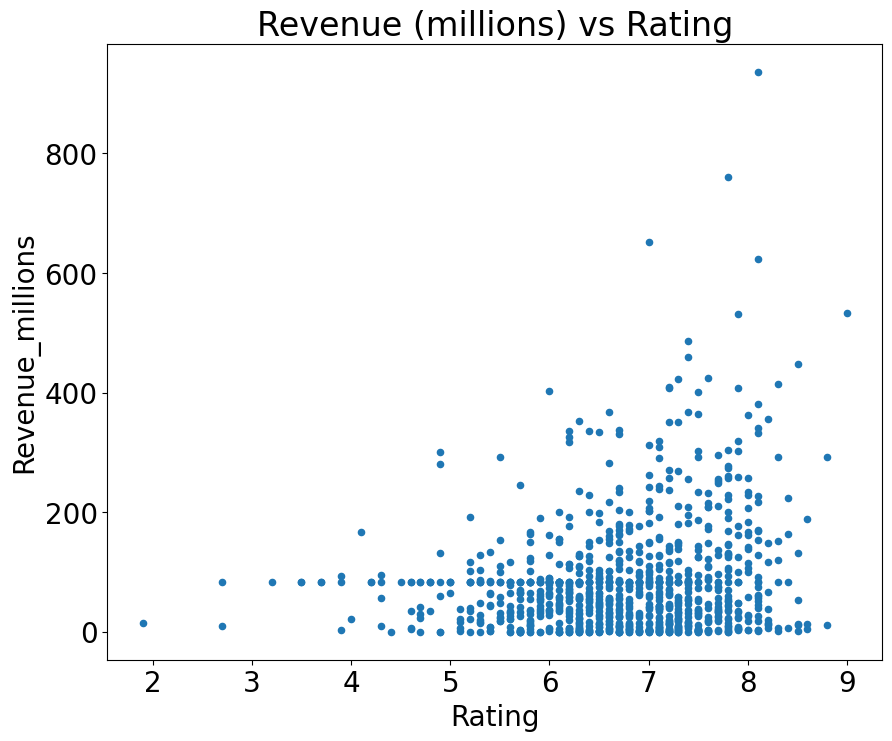

In [66]:
movies_df.plot(kind='scatter', x='Rating', y='Revenue_millions', title='Revenue (millions) vs Rating');

What's with the semicolon? It's not a syntax error, just a way to hide the `<matplotlib.axes._subplots.AxesSubplot at 0x26613b5cc18>` output when plotting in Jupyter notebooks.

If we want to plot a simple Histogram based on a single column, we can call plot on a column:

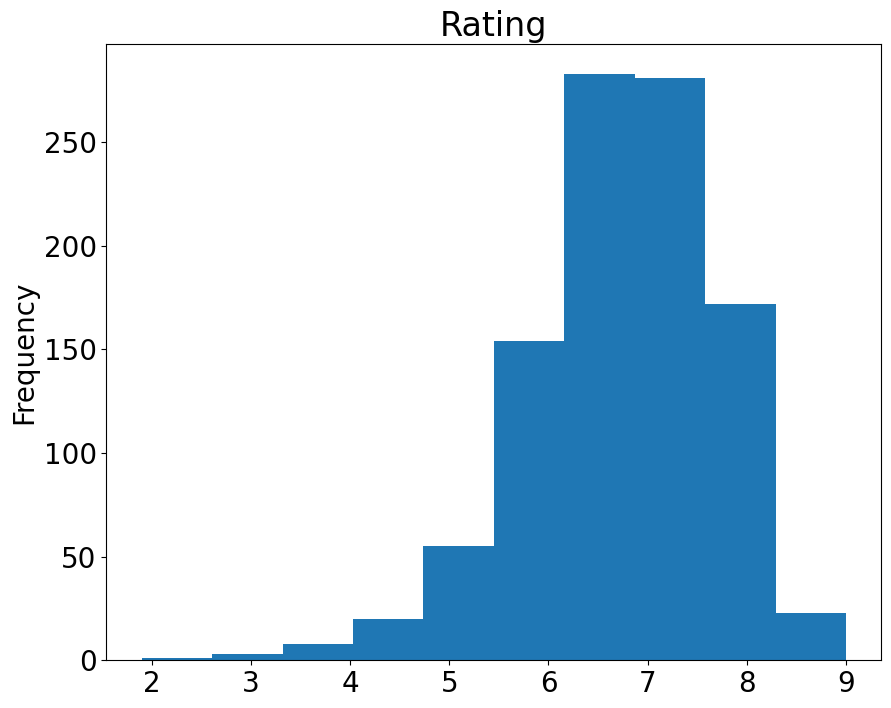

In [67]:
movies_df['Rating'].plot(kind='hist', title='Rating');

Do you remember the `.describe()` example at the beginning of this tutorial? Well, there's a graphical representation of the interquartile range, called the Boxplot. Let's recall what `describe()` gives us on the ratings column:

In [68]:
movies_df['Rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

Using a Boxplot we can visualize this data:

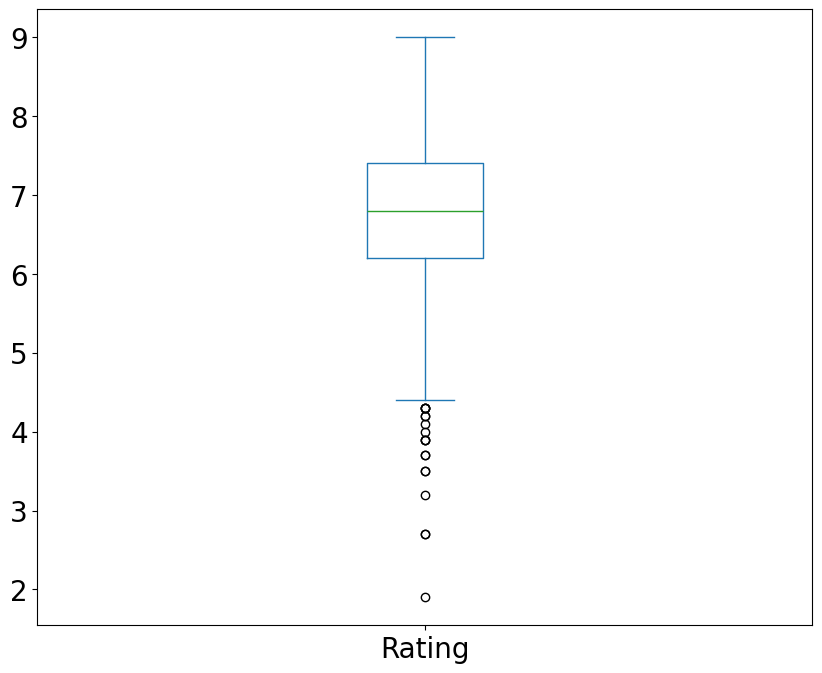

In [69]:
movies_df['Rating'].plot(kind="box");

<figure>
<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif" />
    <figcaption>Source: *Flowing Data*</figcaption>
</figure>


By combining categorical and continuous data, we can create a Boxplot of revenue that is grouped by the Rating Category we created above:

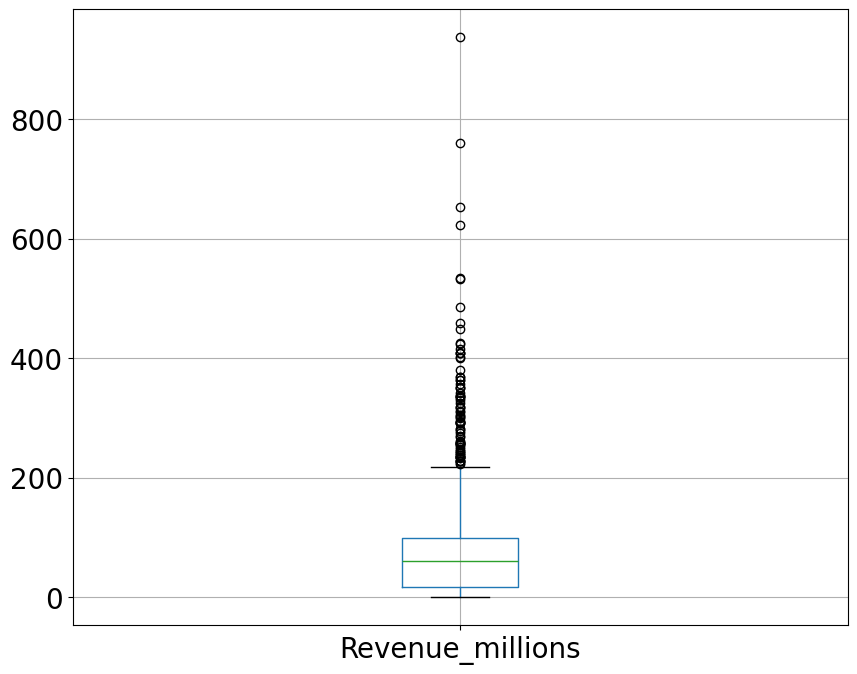

In [71]:
movies_df.boxplot(column='Revenue_millions');

That's the general idea of plotting with pandas. There's too many plots to mention, so definitely take a look at the `plot()` [docs here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) for more information on what it can do.

## Wrapping up

Exploring, cleaning, transforming, and visualization data with pandas in Python is an essential skill in data science. Just cleaning wrangling data is most of your job as a Data Scientist. After a few projects and some practice, you should be very comfortable with most of the basics.

To keep improving, view the [extensive tutorials](https://pandas.pydata.org/pandas-docs/stable/tutorials.html) offered by the official pandas docs.